## Bernoulli example

In [32]:
import numpy as np
import matplotlib.pyplot as plt

7 3


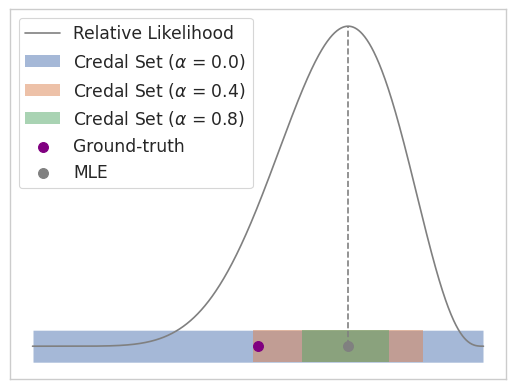

In [57]:
def lik(theta, p, n):
    return theta ** p * (1-theta) ** n

def rel_lik(theta, p, n, theta_mle):
    return lik(theta, p, n) / lik(theta_mle, p, n)

np.random.seed(4)
theta_gt = 0.5
n_instances = 10

data = np.random.binomial(n=1, p=theta_gt, size=n_instances)
# number of positive class
p = np.sum(data)
# number of negative class
n = len(data) - p
print(p, n)

theta = np.linspace(0,1,1000)

rls = rel_lik(theta, p, n, p / n_instances)

fig, ax = plt.subplots()
cutoff = 5
ax.plot(theta[cutoff:-cutoff], rls[cutoff:-cutoff], label='Relative Likelihood', color='grey')
colors = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']
for i, alpha in enumerate([0.0, 0.6, 0.9]):
    cset = theta[rls > alpha]
    plt.fill_between(cset, -0.06, -0.02, alpha=0.4+(alpha*0.6), linewidth=0, label=rf'Credal Set ($\alpha$ = {alpha})', color=colors[i])
    ax.vlines(cset[0], -0.02, rel_lik(cset[0], p, n, p/n_instances), linestyle='--', color=colors[i], alpha=0.4+(alpha*0.6))
    ax.vlines(cset[-1], -0.02, rel_lik(cset[-1], p, n, p/n_instances), linestyle='--', color=colors[i], alpha=0.4+(alpha*0.6))
    ax.hlines(alpha, cset[0], cset[-1], linestyle='--', color='grey', alpha=0.4+(alpha*0.6))
    if i > 0:
        ax.text(cset[0]-0.12,rel_lik(cset[0], p, n, p/n_instances)-0.01,rf'$\alpha$ = {alpha}')
    else:
        ax.text(cset[0],rel_lik(cset[0], p, n, p/n_instances)+0.012,rf'$\alpha$ = {alpha}')

ax.scatter(theta_gt, -0.04, label='Ground-truth', color='grey', s=50)
ax.scatter(p / n_instances, -0.04, label='MLE', color='grey', s=50)
ax.vlines(p / n_instances, -0.01, 1, linestyle='--', color='grey', alpha=0.6)
# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)
# plt.xlabel('theta')
# plt.ylabel('Relative Likelihood')

# remove x axis
ax.set_xticks([])
ax.set_yticks([])
# ax.hlines(-0.01, xmin=0, xmax=1.01, color='black', linewidth=.5)
# ax.vlines(0, ymin=-0.01, ymax=1.01, color='black', linewidth=.5)
#plt.legend()
plt.grid(False)
#plt.show()
plt.savefig('bernoulli.svg', format='svg')